In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('datasets/longley.csv', index_col=0)
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [23]:
X = df.iloc[:,[0,1,2,3,4]]
y = df.iloc[:,-1]
print(X.shape)

(16, 5)


In [24]:
from sklearn.model_selection import train_test_split
seed=123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed)

In [25]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5, random_state=seed)

In [26]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# learning an LR on the scaled training data
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
from sklearn import  metrics
# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled),y_true = y_test)) )

Scaled test set R2: 0.96


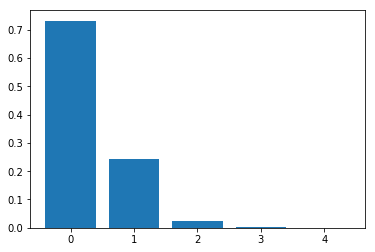

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)

X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

lr = LinearRegression()
# learning an LR on the scaled training data
lr.fit(X_train_scaled_pca, y_train)

# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled_pca),y_true = y_test)) )

Scaled test set R2: 0.98


# Zad

In [31]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("pca", PCA(n_components=3)),
    ("LR", LinearRegression())    
])

In [32]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [33]:
# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) )

Scaled test set R2: 0.98


# Zad

In [34]:
r2_array = []
for i in range(1,X.shape[1]):
    print(i)
    pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR", LinearRegression())    
    ])
    pipe.fit(X_train, y_train)
    # scoring on the scaled test set
    r2_array.append( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) 

1
2
3
4


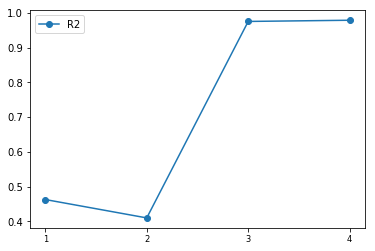

In [35]:
t=range(1,X.shape[1])

plt.plot(r2_array, "o-", label="R2")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad

In [36]:
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR", LinearRegression())    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, X.shape[1]+1)}

In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4, 5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'pca__n_components': 4, 'scaler': None}
Test R2: 0.97


# Zad

In [39]:
from sklearn.svm import SVR
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=2)),
        ("SVR", SVR(kernel='rbf', gamma=0.1))    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 5),
            "SVR__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
            "SVR__gamma": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }

In [40]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVR', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4]), 'SVR__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'SVR__gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [41]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'SVR__C': 1000, 'SVR__gamma': 0.001, 'pca__n_components': 3, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.97


In [42]:
from sklearn.ensemble import RandomForestRegressor

pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=2)),
        ("RF", RandomForestRegressor())    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 5),
            'RF__n_estimators': [70, 200, 700, 800],
            'RF__max_depth':  [100, 170, 200],
            'RF__max_features': ['log2','sqrt','auto'],
            'RF__max_leaf_nodes':  [100, 200],
             }

In [43]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('RF', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_fea...timators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4]), 'RF__n_estimators': [70, 200, 700, 800], 'RF__max_depth': [100, 170, 200], 'RF__max_features': ['log2', 'sqrt', 'auto'], 'RF__max_leaf_nodes': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'RF__max_depth': 170, 'RF__max_features': 'auto', 'RF__max_leaf_nodes': 100, 'RF__n_estimators': 70, 'pca__n_components': 1, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.32
